In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [11]:

!pip install kaggle


In [12]:
!kaggle datasets download -d csafrit2/maternal-health-risk-data


Dataset URL: https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data
License(s): other
maternal-health-risk-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [13]:
import zipfile

# Unzip the file downloaded from Kaggle
with zipfile.ZipFile("maternal-health-risk-data.zip", 'r') as zip_ref:
    zip_ref.extractall("maternal_data")  # This will create a folder named 'maternal_data'


In [4]:
df = pd.read_csv("maternal_data/maternal_health_risk.csv")
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [5]:
#EDA

In [6]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [7]:
df.shape

(1014, 7)

In [8]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [22]:
#Data Cleaning and Preprocessing

In [10]:
df.duplicated().sum()

np.int64(562)

In [11]:
df_cleaned = df.drop_duplicates()
print(f"New shape: {df_cleaned.shape}")


New shape: (452, 7)


In [12]:
df = df_cleaned

In [13]:
df.shape


(452, 7)

In [20]:
#Adding other columns correlated with the Risk Level 


In [15]:
def generate_pregnancies(risk):
    if risk == 'low risk':
        return np.random.randint(1, 3)
    elif risk == 'mid risk':
        return np.random.randint(2, 5)
    else:
        return np.random.randint(3, 7)

df['NumberOfPregnancies'] = df['RiskLevel'].apply(generate_pregnancies)


In [16]:
def generate_complications(risk):
    if risk == 'low risk':
        return np.random.choice([0, 1], p=[0.95, 0.05])
    elif risk == 'mid risk':
        return np.random.choice([0, 1], p=[0.75, 0.25])
    else:
        return np.random.choice([0, 1], p=[0.3, 0.7])

df['PreviousComplications'] = df['RiskLevel'].apply(generate_complications)



In [17]:
def generate_hemoglobin(risk):
    if risk == 'low risk':
        return round(np.random.normal(13.2, 0.7), 1)
    elif risk == 'mid risk':
        return round(np.random.normal(11.2, 0.6), 1)
    else:
        return round(np.random.normal(9.5, 0.8), 1)

df['Hemoglobin'] = df['RiskLevel'].apply(generate_hemoglobin)



In [18]:
def generate_bmi(risk):
    if risk == 'low risk':
        return round(np.random.normal(22.5, 1.5), 1)
    elif risk == 'mid risk':
        return round(np.random.normal(26.5, 2.0), 1)
    else:
        return round(np.random.normal(31.5, 3.5), 1)

df['BMI'] = df['RiskLevel'].apply(generate_bmi)



In [19]:
df.head()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,NumberOfPregnancies,PreviousComplications,Hemoglobin,BMI
0,25,130,80,15.0,98.0,86,high risk,5,0,10.9,35.0
1,35,140,90,13.0,98.0,70,high risk,4,1,10.6,33.0
2,29,90,70,8.0,100.0,80,high risk,6,0,9.3,34.8
3,30,140,85,7.0,98.0,70,high risk,5,0,8.8,31.3
4,35,120,60,6.1,98.0,76,low risk,2,0,13.0,22.5


In [23]:
#Feature Engineering

In [21]:
from sklearn.preprocessing import StandardScaler

# Define columns to scale
scale_cols = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'Hemoglobin', 'BMI']

# Initialize scaler
scaler = StandardScaler()

# Fit-transform
df_scaled = df.copy()
df_scaled[scale_cols] = scaler.fit_transform(df_scaled[scale_cols])

# Preview
df_scaled.head()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,NumberOfPregnancies,PreviousComplications,Hemoglobin,BMI
0,-0.305021,1.089310,0.333484,2.354439,-0.491351,1.479009,high risk,5,0,-0.530546,2.232645
1,0.422139,1.649455,1.061321,1.646744,-0.491351,-0.484676,high risk,4,1,-0.705673,1.755965
2,-0.014157,-1.151273,-0.394352,-0.122492,0.927758,0.742627,high risk,6,0,-1.464555,2.184977
3,0.058559,1.649455,0.697402,-0.476340,-0.491351,-0.484676,high risk,5,0,-1.756433,1.350787
4,0.422139,0.529164,-1.122188,-0.794802,-0.491351,0.251706,low risk,2,0,0.695341,-0.746605


In [24]:
#label Encoding of Risk level and correlation with other input factors

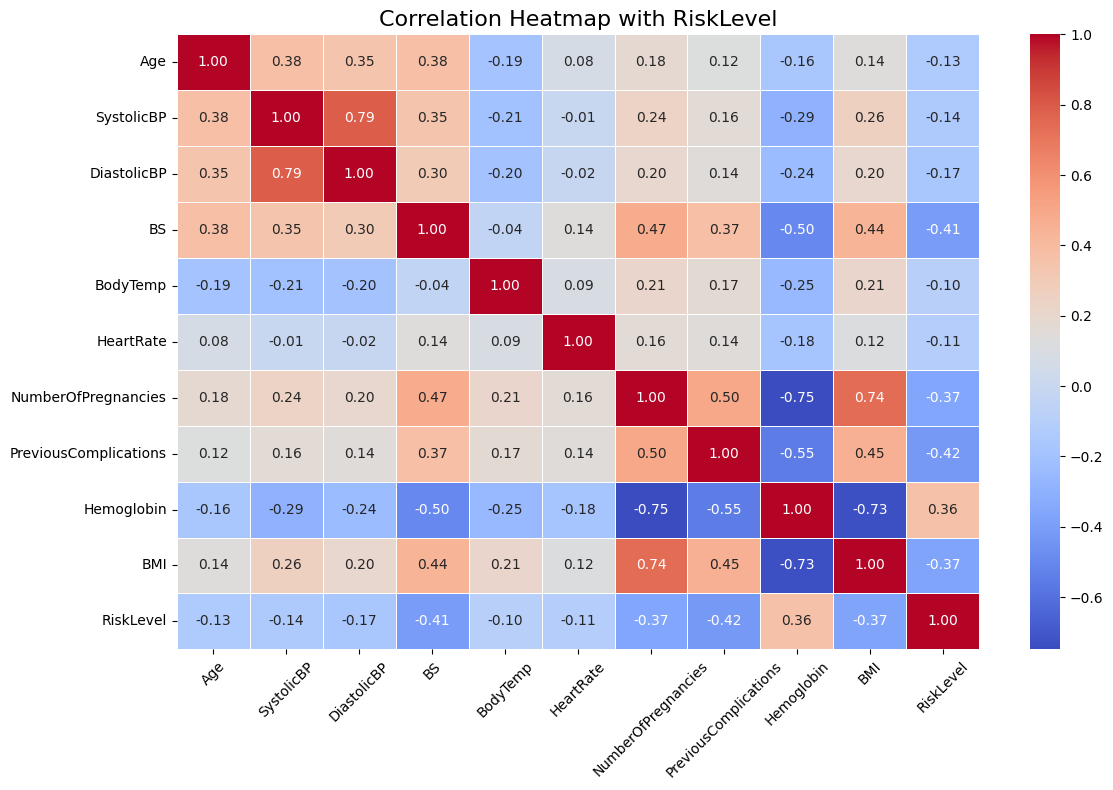

In [25]:
from sklearn.preprocessing import LabelEncoder

# Encode RiskLevel as numeric: (low risk = 0, mid risk = 1, high risk = 2)
df_corr = df.copy()
le = LabelEncoder()
df_corr['RiskLevel'] = le.fit_transform(df_corr['RiskLevel'])

# Select columns for correlation analysis
corr_columns = [
    'Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
    'NumberOfPregnancies', 'PreviousComplications', 'Hemoglobin', 'BMI',
    'RiskLevel'
]

# Compute correlation matrix
corr_matrix = df_corr[corr_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap with RiskLevel", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [30]:
df= df_scaled
le = LabelEncoder()
df['RiskLevel'] = le.fit_transform(df['RiskLevel'])  # low = 0, mid = 1, high = 2

In [31]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,NumberOfPregnancies,PreviousComplications,Hemoglobin,BMI
0,-0.305021,1.089310,0.333484,2.354439,-0.491351,1.479009,0,5,0,-0.530546,2.232645
1,0.422139,1.649455,1.061321,1.646744,-0.491351,-0.484676,0,4,1,-0.705673,1.755965
2,-0.014157,-1.151273,-0.394352,-0.122492,0.927758,0.742627,0,6,0,-1.464555,2.184977
3,0.058559,1.649455,0.697402,-0.476340,-0.491351,-0.484676,0,5,0,-1.756433,1.350787
4,0.422139,0.529164,-1.122188,-0.794802,-0.491351,0.251706,1,2,0,0.695341,-0.746605


In [32]:
#Model Training


🔹 Logistic Regression
Accuracy: 0.9780
Confusion Matrix:
 [[23  0  0]
 [ 0 47  0]
 [ 1  1 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       0.98      1.00      0.99        47
           2       1.00      0.90      0.95        21

    accuracy                           0.98        91
   macro avg       0.98      0.97      0.97        91
weighted avg       0.98      0.98      0.98        91


🔹 Random Forest
Accuracy: 0.9890
Confusion Matrix:
 [[23  0  0]
 [ 0 46  1]
 [ 0  0 21]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.98      0.99        47
           2       0.95      1.00      0.98        21

    accuracy                           0.99        91
   macro avg       0.98      0.99      0.99        91
weighted avg       0.99      0.99      0.99        91


🔹 S

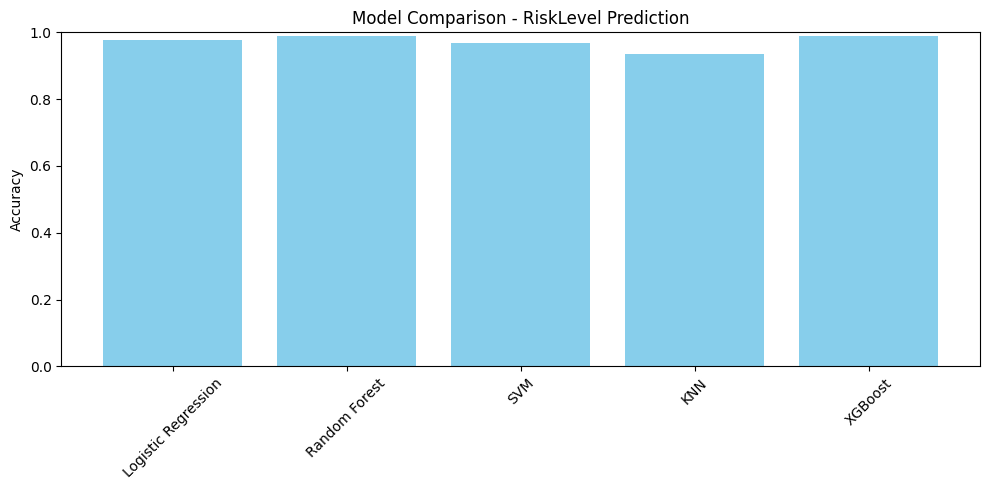

In [33]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Step 1: Prepare data
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']  # Should be numeric (e.g., 0, 1, 2)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 3: Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(kernel='rbf', probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Step 4: Train & Evaluate
results = {}

for name, model in models.items():
    print(f"\n🔹 {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    results[name] = acc

plt.figure(figsize=(10,5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel("Accuracy")
plt.title("Model Comparison - RiskLevel Prediction")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [34]:
#Hyperparameter Tuning

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=2
)

grid_search_rf.fit(X_train, y_train)

print("✅ Best parameters for Random Forest:", grid_search_rf.best_params_)
print("✅ Best accuracy:", grid_search_rf.best_score_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
✅ Best parameters for Random Forest: {'bootstrap': True, 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
✅ Best accuracy: 0.9722983257229834


In [36]:
#hyperparameter tuning of XGB Model
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=2
)

grid_search_xgb.fit(X_train, y_train)

print("✅ Best parameters for XGBoost:", grid_search_xgb.best_params_)
print("✅ Best accuracy:", grid_search_xgb.best_score_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
✅ Best parameters for XGBoost: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1}
✅ Best accuracy: 0.9695205479452056


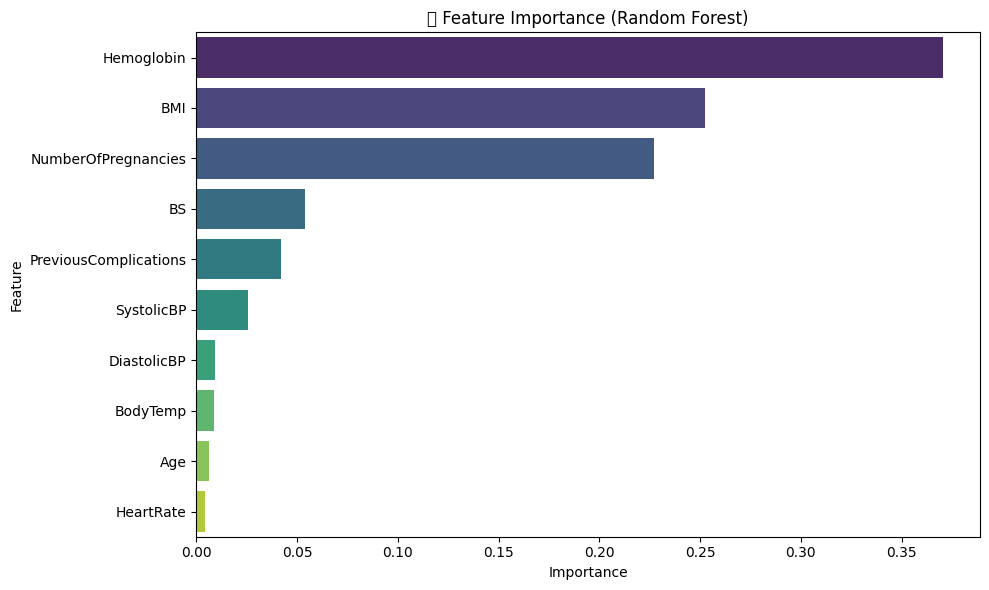

In [38]:
# Get feature importances from best RF model
importances = grid_search_rf.best_estimator_.feature_importances_
features = X.columns

# Create DataFrame
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title('🔍 Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

In [39]:
import joblib

# Save the model
joblib.dump(grid_search_rf.best_estimator_, 'maternAI_rf_model.pkl')

# Save scaler too (important if using StandardScaler)
joblib.dump(scaler, 'maternAI_scaler.pkl')

print("✅ Model and scaler saved successfully.")


✅ Model and scaler saved successfully.
